In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
CSV_PATH = './data/housing_california.csv'

### Load and preprocess data

In [83]:
data = pd.read_csv(CSV_PATH, sep=',')
data = data.dropna()

ocean_proximity_ohe = pd.get_dummies(data['ocean_proximity']) 
data = data.join(ocean_proximity_ohe)
data = data.drop(columns=['ocean_proximity'])

data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']
data['household_rooms'] = data['total_rooms'] / data['households']
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,False,True,False,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,False,True,False,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,False,True,False,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,False,True,False,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,False,True,False,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,False,True,False,False,False,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,False,True,False,False,False,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,False,True,False,False,False,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,False,True,False,False,False,0.799078,1.285243


### Show distributions

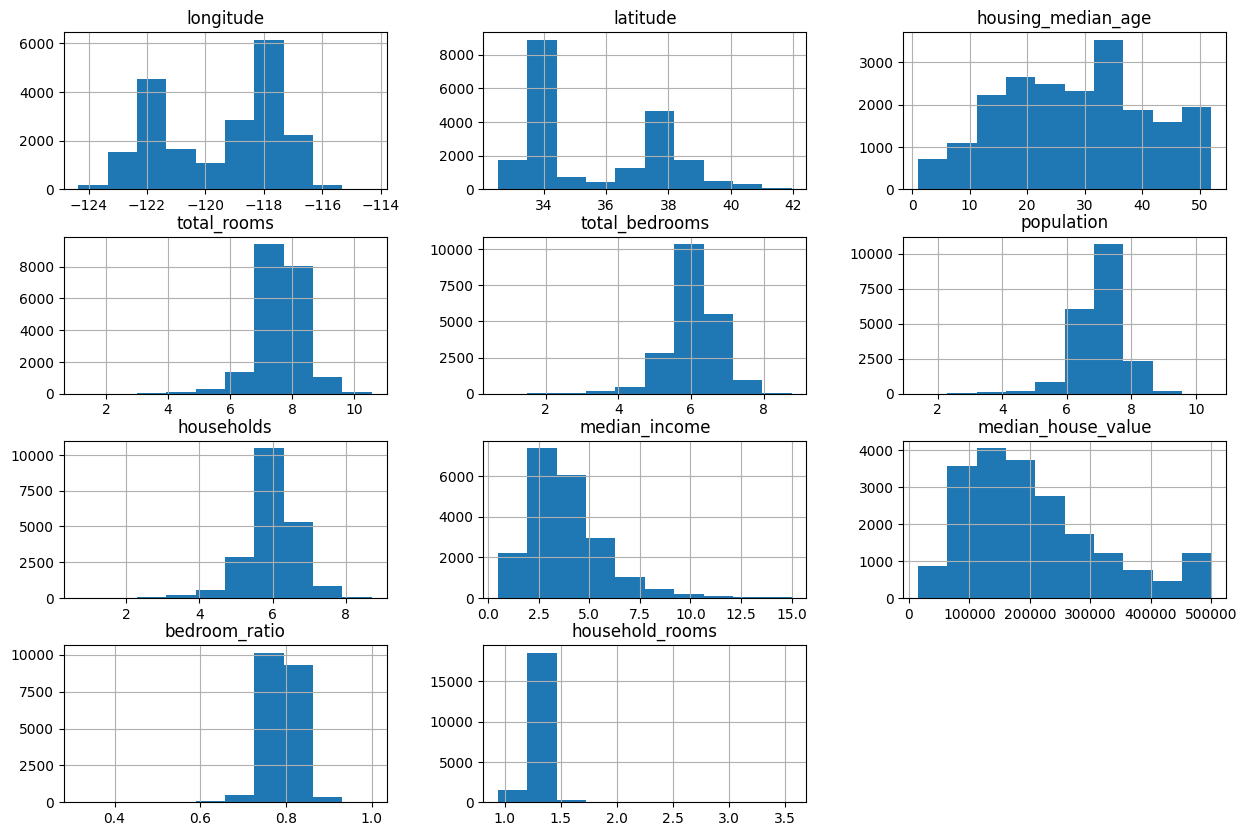

In [84]:
data.hist(figsize=(15,10))
plt.show()

### Show feature colerations

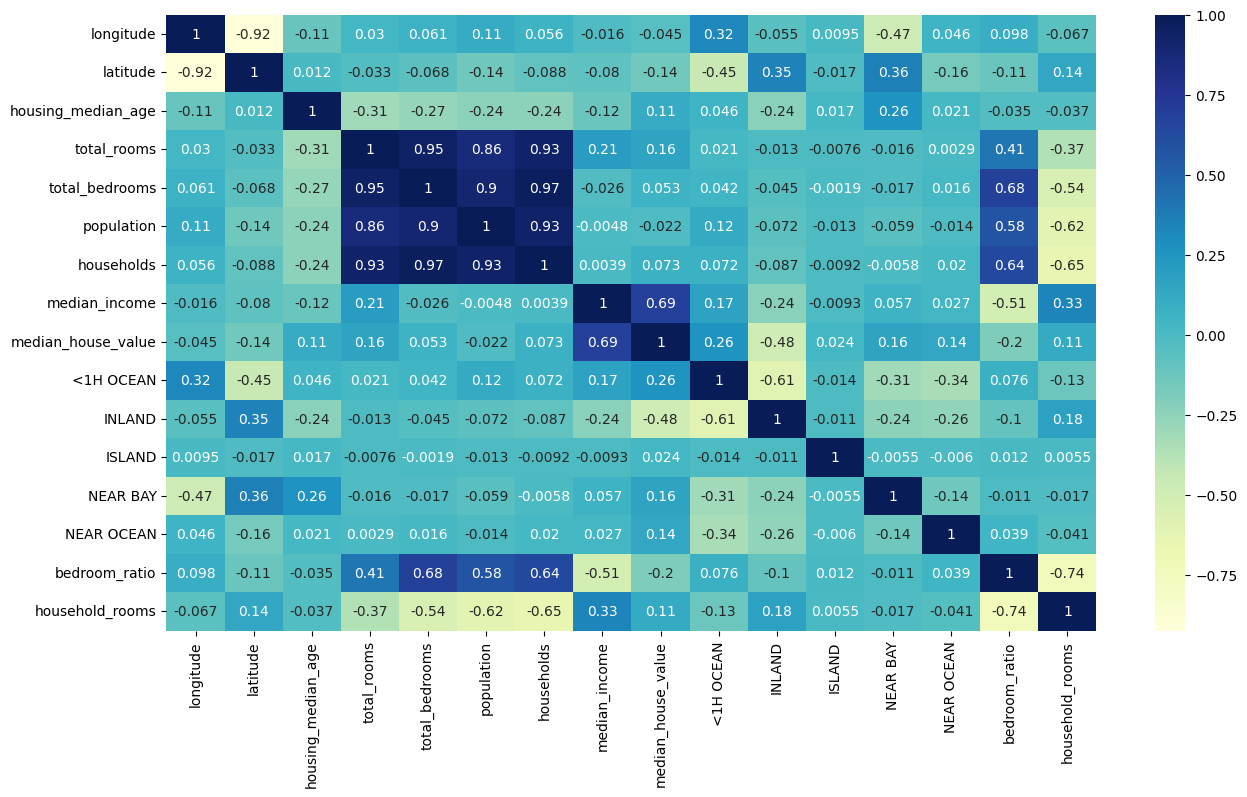

In [86]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Show lat-long

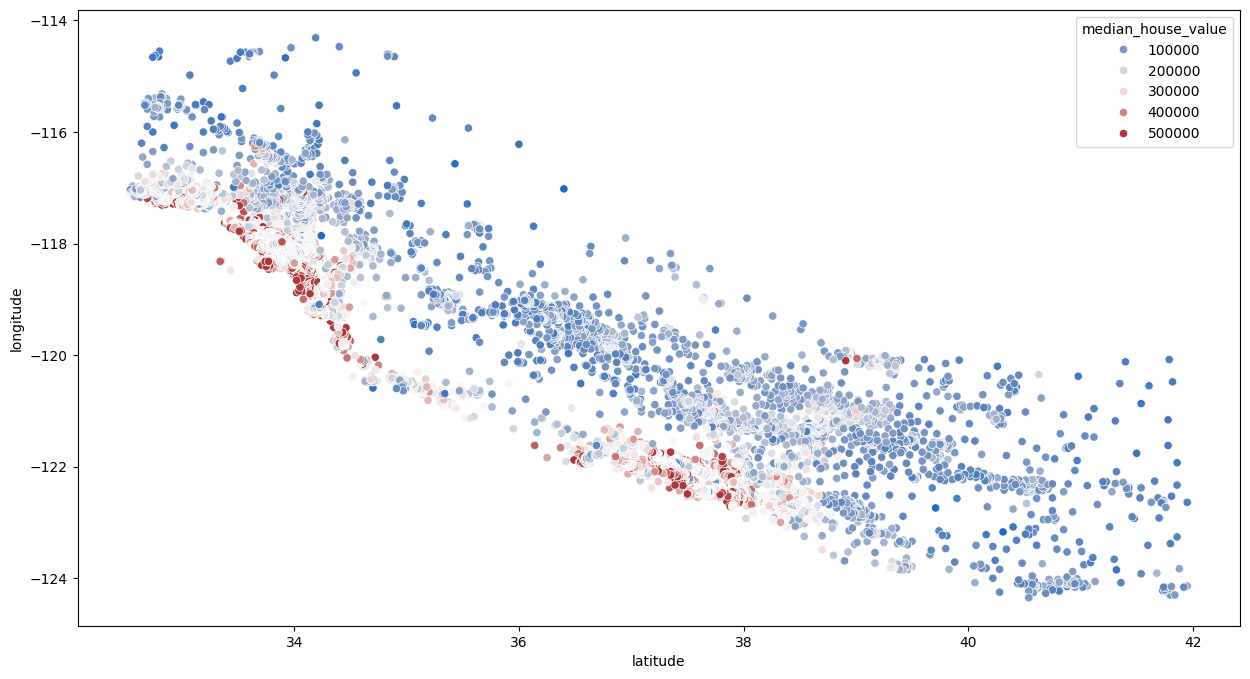

In [87]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=data, hue='median_house_value', palette='vlag')
plt.show()

### Prepare data for regression

In [90]:
from sklearn.model_selection import train_test_split

xs = data.drop(['median_house_value'], axis=1)
xs = xs.to_numpy()
ys = data['median_house_value']
ys = ys.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2)

print('train:')
print(x_train.shape)
print(y_train.shape)
print()
print('test:')
print(x_test.shape)
print(y_test.shape)

train:
(16346, 15)
(16346,)

test:
(4087, 15)
(4087,)


### Training & Evaluation

In [91]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6731503299408085

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

score = model.score(x_test, y_test)
print(f'Score: {score}')
print(f'RMSE Score: {rmse}')
print(f'Mean house price: {np.mean(y_test)}')
print(f'RMSE of Mean house price %: {(rmse / np.mean(y_test)) * 100}%')

Score: 0.6731503299408085
RMSE Score: 66143.6592743921
Mean house price: 206883.6501101052
RMSE of Mean house price %: 31.97142898396751%
